<a href="https://colab.research.google.com/github/JanaSuchomel/Final_project/blob/main/Fin%C3%A1ln%C3%AD_verze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    recall_score, precision_score, f1_score, roc_curve, auc
)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization, Embedding, Flatten, Input, Concatenate
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


                                  Rekonstruovan√Ω text  label
0   Palestinians switch off Christmas lights in Be...      1
1   China says Trump call with Taiwan president wo...      1
3   Zimbabwe military chief's China trip was norma...      1
5   Suspected Boko Haram suicide bombers kill at l...      1
7   Senate Democrats ask Trump attorney general pi...      1
10  A North Korea nuclear test over the Pacific? L...      1
11  Czech police ask parliament to allow prosecuti...      1
14  Nearly half of Americans still oppose Republic...      1
15  White House declines to say if Trump has made ...      1
16  U.S. appeals court hears arguments on Virginia...      1
20  Argentina says satellite calls detected, likel...      1
21  Trump gains ground on Clinton: Reuters/Ipsos S...      1
22  Carson to HUD: The agency that oversees public...      1
30  McConnell says will discuss Supreme Court pick...      1
31  U.S. plan to move Israel embassy sign of 'fail...      1
32  lol listen to yoko 

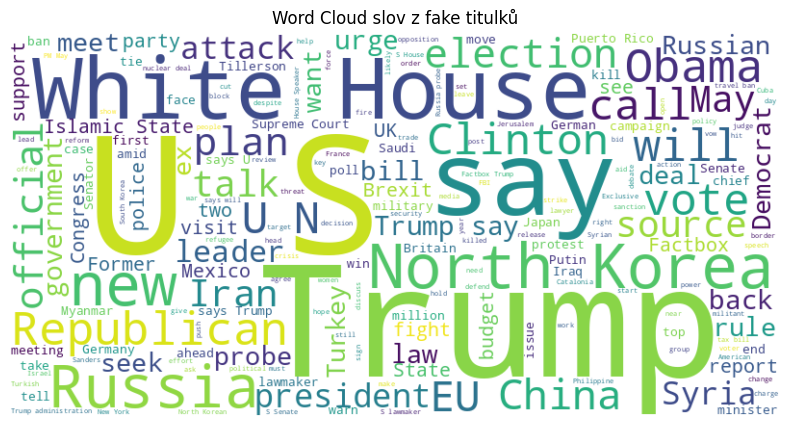

In [6]:
# Naƒçten√≠ p≈Øvodn√≠ho datasetu
df = pd.read_csv("train (2).csv", sep=";")  # Uprav cestu k souboru podle pot≈ôeby

# Pou≈æit√≠ p≈Øvodn√≠ch titulk≈Ø m√≠sto predikovan√Ωch dat
df["Rekonstruovan√Ω text"] = df["title"].astype(str)

# Zobrazen√≠ nƒõkolika uk√°zkov√Ωch fake text≈Ø (filtrujeme jen fake news)
df_fake = df[df["label"] == 1]  # P≈ôedpokl√°d√°m, ≈æe 1 oznaƒçuje fake news
print(df_fake[["Rekonstruovan√Ω text", "label"]].head(20))

# Vytvo≈ôen√≠ Word Cloud pro fake titulky
fake_texts = " ".join(df_fake["Rekonstruovan√Ω text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(fake_texts)

# Zobrazen√≠ Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud slov z fake titulk≈Ø")
plt.show()

                                  Rekonstruovan√Ω text  label
2    FAIL! The Trump Organization‚Äôs Credit Score W...      0
4   THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...      0
6   WATCH: John Oliver Presents GOP Debates As ‚ÄòCl...      0
8    Trump HUMILIATES Republicans In Latest Hissy ...      0
9   MACY‚ÄôS GETS THE BOOT FROM LOYAL CUSTOMERS AFTE...      0
12  ONE DEMOCRAT WHO REFUSES To Cast Electoral Vot...      0
13   WATCH: Senator Al Franken Just Ripped Ted Cru...      0
17  WOW! UNHINGED CLOWN DEMOCRAT Goes Nuts On Hous...      0
18   Heiress To Disney Empire Knows GOP Scammed Us...      0
19   Trump Staffers Admit Their Boss Has No Idea W...      0
23  WATCH: NANCY PELOSI COMES UNGLUED! Calls A Pie...      0
24   WATCH: Donald Trump Is OBSESSED With His Desi...      0
25  BIKERS FOR TRUMP Will Travel To Future Rallies...      0
26  ‚ÄúHILL‚ÄùARIOUS‚Ä¶MUST SEE! IOWA PARADE GOERS Treat...      0
27  [Video] BURGER KING MANAGER CURSES OUT AND THR...      0
28   ‚ÄòGod

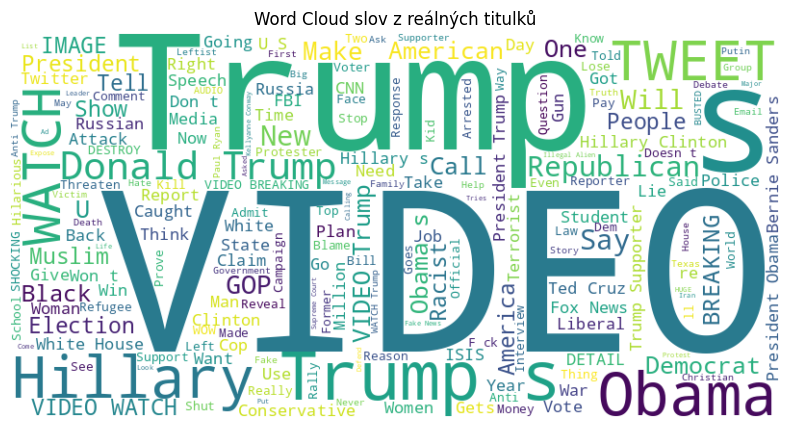

In [7]:
# Naƒçten√≠ p≈Øvodn√≠ho datasetu
df = pd.read_csv("train (2).csv", sep=";")  # Uprav cestu k souboru podle pot≈ôeby

# Pou≈æit√≠ p≈Øvodn√≠ch titulk≈Ø m√≠sto predikovan√Ωch dat
df["Rekonstruovan√Ω text"] = df["title"].astype(str)

# Filtrujeme jen re√°ln√© (pravdiv√©) titulky
df_real = df[df["label"] == 0]  # P≈ôedpokl√°d√°m, ≈æe 0 oznaƒçuje re√°ln√© zpr√°vy
print(df_real[["Rekonstruovan√Ω text", "label"]].head(20))

# Vytvo≈ôen√≠ Word Cloud pro re√°ln√© titulky
real_texts = " ".join(df_real["Rekonstruovan√Ω text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(real_texts)

# Zobrazen√≠ Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud slov z re√°ln√Ωch titulk≈Ø")
plt.show()

Zde byl pou≈æit pouze klasifikaƒçn√≠ model:

In [ ]:
# data sets
test_df = pd.read_csv('test (1).csv', sep=';')
train_df = pd.read_csv('train (2).csv', sep=';')

# processing data
target_column = train_df.columns[-1]  #target column
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]

# use same LabelEncoder for testing and training data
encoder = LabelEncoder()

# learning encoder on y_train
encoder.fit(y_train)

# transform both data sets
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)  # same encoder fo no errors

# transfer to  one-hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# processing text columns
text_columns = X_train.select_dtypes(include=['object']).columns
for col in text_columns:
    le = LabelEncoder()
    # Fit the LabelEncoder on the combined unique values from both train and test
    all_values = pd.concat([X_train[col], X_test[col]]).unique()
    le.fit(all_values)
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# normalize numbers columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# neural network creation
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer"
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(32, activation='relu'),  # Hidden layer
    Dense(y_train.shape[1], activation='softmax')  # Output layer (softmax for multiple classes)
])

# Model compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# training model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# model evaluation
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  #converting probabilities to classes
y_test_classes = np.argmax(y_test, axis=1)

# displaying the classification report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# displaying the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


762/762 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 5ms/step - accuracy: 0.7189 - loss: 0.5589 - val_accuracy: 0.7551 - val_loss: 0.4868
Epoch 2/50
762/762 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 9ms/step - accuracy: 0.7545 - loss: 0.5005 - val_accuracy: 0.7446 - val_loss: 0.4764
Epoch 3/50
762/762 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 5ms/step - accuracy: 0.7602 - loss: 0.4846 - val_accuracy: 0.7722 - val_loss: 0.4653
Epoch 4/50
762/762 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4ms/step - accuracy: 0.7670 - loss: 0.4725 - val_accuracy: 0.7679 - val_loss: 0.4617
Epoch 5/50
762/762 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.7688 - loss: 0.4618 - val_accuracy: 0.7741 - val_loss: 0.4391
Epoch 6/50
762/762 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.7650 - loss: 0.4548 - val_accuracy: 0.7798 - val_loss: 0.4249
Epo

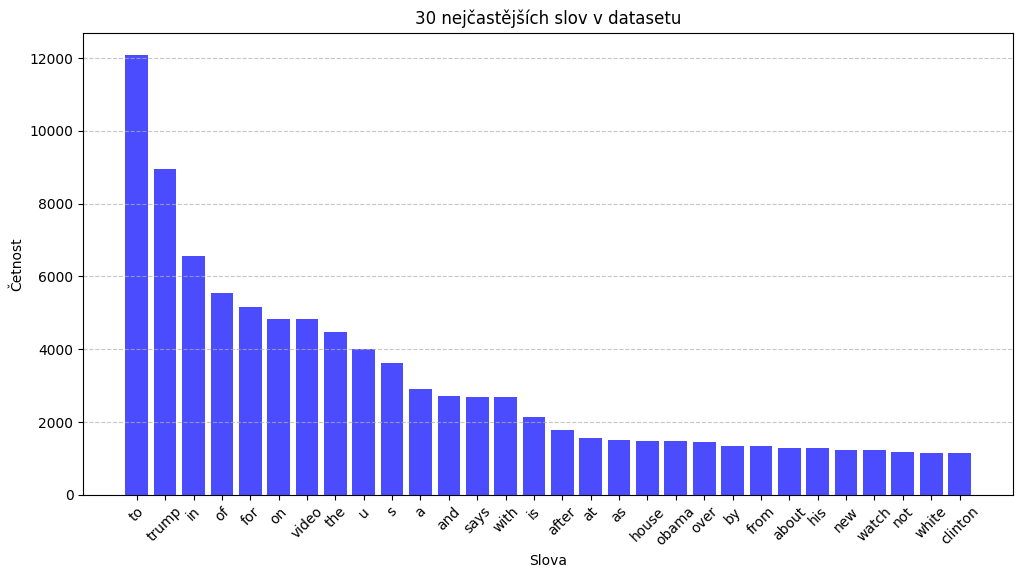

In [ ]:
#ssuming your data is in 'train (2).csv' and 'test (1).csv'
train_df = pd.read_csv('train (2).csv', sep=';')
test_df = pd.read_csv('test (1).csv', sep=';')
df_all = pd.concat([train_df, test_df]) # create df_all by concatenating train and test

#Ujist√≠me se, ≈æe 'title' neobsahuje NaN hodnoty
df_all['title'] = df_all['title'].astype(str).fillna("")

#Tokenizace v≈°ech text≈Ø v datasetu
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_all['title'])

#Poƒçet slov v datasetu
word_counts = dict(tokenizer.word_counts)

#Se≈ôazen√≠ slov podle ƒçetnosti (sestupnƒõ)
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

#V√Ωbƒõr 30 nejƒçastƒõj≈°√≠ch slov
top_words = sorted_word_counts[:30]
words, counts = zip(*top_words)  # Rozdƒõlen√≠ na slova a jejich ƒçetnosti

#Graf distribuce ƒçetnosti slov
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='blue', alpha=0.7)
plt.xlabel("Slova")
plt.ylabel("ƒåetnost")
plt.title("30 nejƒçastƒõj≈°√≠ch slov v datasetu")
plt.xticks(rotation=45)  # Otoƒçen√≠ popisk≈Ø osy X pro lep≈°√≠ ƒçitelnost
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Zobrazen√≠ grafu
plt.show()

TF-IDF



In [ ]:
# Funkce pro naƒçten√≠ a spojen√≠ dat
def load_and_merge_data(train_path, test_path, submit_path):
    train_df = pd.read_csv(train_path, sep=';')
    test_df = pd.read_csv(test_path, sep=';')
    submit_df = pd.read_csv(submit_path, sep=';')
    test_df = pd.concat([test_df, submit_df], axis=0, ignore_index=True).drop(columns=["idS"], errors='ignore')
    df_all = pd.concat([train_df, test_df], axis=0, ignore_index=True)
    return df_all

# Funkce pro p≈ôedzpracov√°n√≠ dat pomoc√≠ TF-IDF a imputace
def preprocess_data(df):
    target_column = df.columns[-1]
    X = df.drop(columns=[target_column])
    Y = df[target_column]

    # Imputace chybƒõj√≠c√≠ch numerick√Ωch hodnot
    imputer = SimpleImputer(strategy='mean')
    X_num_imputed = pd.DataFrame(imputer.fit_transform(X.select_dtypes(include=np.number)), columns=X.select_dtypes(include=np.number).columns)

    # Transformace textov√Ωch dat pomoc√≠ TF-IDF
    if 'title' in df.columns:
        tfidf_vectorizer = TfidfVectorizer(max_features=10000)
        X_title_tfidf = tfidf_vectorizer.fit_transform(df['title'].astype(str).str.lower().fillna("")).toarray()
    else:
        X_title_tfidf = np.zeros((X.shape[0], 10000))

    # Standardizace numerick√Ωch dat
    scaler = StandardScaler()
    X_num_scaled = scaler.fit_transform(X_num_imputed)

    # Slouƒçen√≠ numerick√Ωch a textov√Ωch dat
    X_final = np.hstack([X_num_scaled, X_title_tfidf])

    # Label encoding a one-hot encoding pro c√≠lovou promƒõnnou
    label_encoder = LabelEncoder()
    Y_encoded = label_encoder.fit_transform(Y)
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    Y_onehot = one_hot_encoder.fit_transform(Y_encoded.reshape(-1, 1))

    return X_final, Y_onehot

# Funkce pro vytvo≈ôen√≠ modelu
def create_model(input_shape, num_classes):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_shape,), kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=3e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Naƒçten√≠ a p≈ôedzpracov√°n√≠ dat
df_all = load_and_merge_data('train (2).csv', 'test (1).csv', 'evaluation.csv')
X, Y = preprocess_data(df_all)

# Rozdƒõlen√≠ dat
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Vytvo≈ôen√≠ a tr√©nov√°n√≠ modelu
model = create_model(X_train.shape[1], y_train.shape[1])
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)
history = model.fit(X_train, y_train, epochs=40, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47s 170ms/step - accuracy: 0.6965 - loss: 1.1894 - val_accuracy: 0.9245 - val_loss: 0.9221 - learning_rate: 3.0000e-04
Epoch 2/40
254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79s 160ms/step - accuracy: 0.9302 - loss: 0.6041 - val_accuracy: 0.9348 - val_loss: 0.6272 - learning_rate: 3.0000e-04
Epoch 3/40
254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42s 165ms/step - accuracy: 0.9556 - loss: 0.5241 - val_accuracy: 0.9387 - val_loss: 0.5649 - learning_rate: 3.0000e-04
Epoch 4/40
254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 83s 169ms/step - accuracy: 0.9706 - loss: 0.4640 - val_accuracy: 0.9373 - val_loss: 0.5635 - learning_rate: 3.0000e-04
Epoch 5/40
254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43s 169ms/step - accuracy: 0.9799 - loss: 0.4180 - val_accuracy: 0.9342 - val_loss: 0.5662 - learning_rate: 3.0000e-04
Epoch

KeyboardInterrupt: 

**BERT**

Pou≈æit√≠ neuronov√© s√≠tƒõ s pomoc√≠ TensorFlow na klasifikaƒçn√≠ b√°zi - pokroƒçil√© zpracov√°n√≠ textu

In [ ]:
# Funkce pro naƒçten√≠ a spojen√≠ dat
def load_and_merge_data(train_path, test_path, submit_path):
    train_df = pd.read_csv(train_path, sep=';')
    test_df = pd.read_csv(test_path, sep=';')
    submit_df = pd.read_csv(submit_path, sep=';')
    test_df = pd.concat([test_df, submit_df], axis=0, ignore_index=True).drop(columns=["idS"], errors='ignore')
    df_all = pd.concat([train_df, test_df], axis=0, ignore_index=True)
    return df_all

# Funkce pro p≈ôedzpracov√°n√≠ dat pomoc√≠ BERT a imputace
def preprocess_data(df):
    target_column = df.columns[-1]
    X = df.drop(columns=[target_column])
    Y = df[target_column]

    # Imputace chybƒõj√≠c√≠ch numerick√Ωch hodnot
    imputer = SimpleImputer(strategy='mean')
    X_num_imputed = pd.DataFrame(imputer.fit_transform(X.select_dtypes(include=np.number)), columns=X.select_dtypes(include=np.number).columns)

    # Pou≈æit√≠ BERT pro textov√© zpracov√°n√≠
    if 'title' in df.columns:
        tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  # Pou≈æ√≠v√°me p≈ôedtr√©novan√Ω BERT tokenizer
        model = BertModel.from_pretrained('bert-base-uncased')  # Pou≈æ√≠v√°me p≈ôedtr√©novan√Ω BERT model

        # Ujist√≠me se, ≈æe 'title' obsahuje pouze textov√© hodnoty (≈ôetƒõzce)
        titles = df['title'].astype(str).fillna('')

        def get_bert_embeddings(texts):
            # Kontrola, ≈æe texts je seznam ≈ôetƒõzc≈Ø
            if isinstance(texts, str):
                texts = [texts]
            inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt', max_length=512)  # Tensors pro BERT model
            with torch.no_grad():  # Deaktivujeme v√Ωpoƒçet gradient≈Ø pro rychlej≈°√≠ inference
                outputs = model(**inputs)
            return outputs.last_hidden_state.mean(dim=1).numpy()  # Pr≈Ømƒõr posledn√≠ch skryt√Ωch stav≈Ø jako embeddingy

        X_title_bert = get_bert_embeddings(titles.tolist())  # Vytv√°≈ô√≠me embeddingy pro texty
    else:
        X_title_bert = np.zeros((X.shape[0], 768))  # BERT embeddingy maj√≠ rozmƒõr 768

    # Standardizace numerick√Ωch dat
    scaler = StandardScaler()
    X_num_scaled = scaler.fit_transform(X_num_imputed)

    # Slouƒçen√≠ numerick√Ωch a textov√Ωch dat
    X_final = np.hstack([X_num_scaled, X_title_bert])

    # Label encoding a one-hot encoding pro c√≠lovou promƒõnnou
    label_encoder = LabelEncoder()
    Y_encoded = label_encoder.fit_transform(Y)
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    Y_onehot = one_hot_encoder.fit_transform(Y_encoded.reshape(-1, 1))

    return X_final, Y_onehot

# Funkce pro vytvo≈ôen√≠ modelu
def create_model(input_shape, num_classes):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_shape,), kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=3e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Naƒçten√≠ a p≈ôedzpracov√°n√≠ dat
df_all = load_and_merge_data('train (2).csv', 'test (1).csv', 'evaluation.csv')
X, Y = preprocess_data(df_all)

# Rozdƒõlen√≠ dat
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Vytvo≈ôen√≠ a tr√©nov√°n√≠ modelu
model = create_model(X_train.shape[1], y_train.shape[1])
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)
history = model.fit(X_train, y_train, epochs=40, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

Neur√°ln√≠ s√≠≈• pro klasifikaci, kter√° kombinuje numerick√© a textov√© vstupy.
Byl pou≈æit pouze sloupec "title".

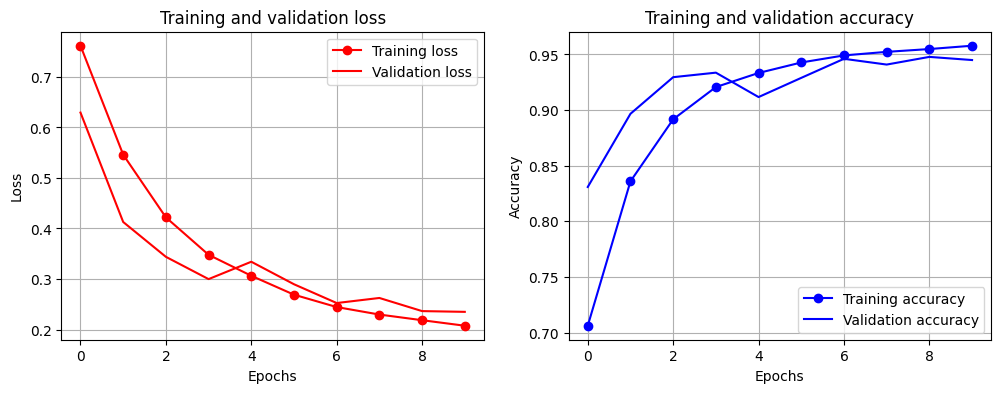

254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3698
           1       0.95      0.96      0.95      4420

    accuracy                           0.95      8118
   macro avg       0.95      0.95      0.95      8118
weighted avg       0.95      0.95      0.95      8118


Confusion Matrix:


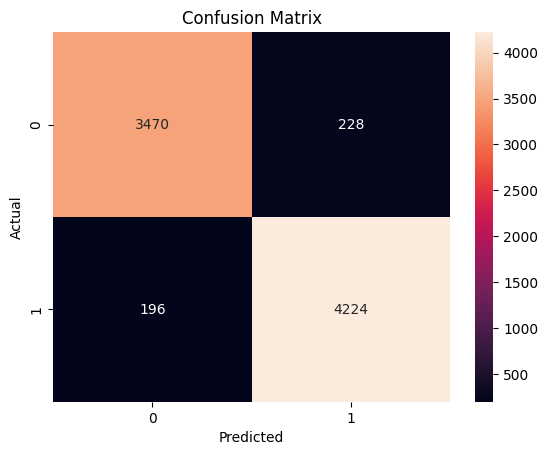

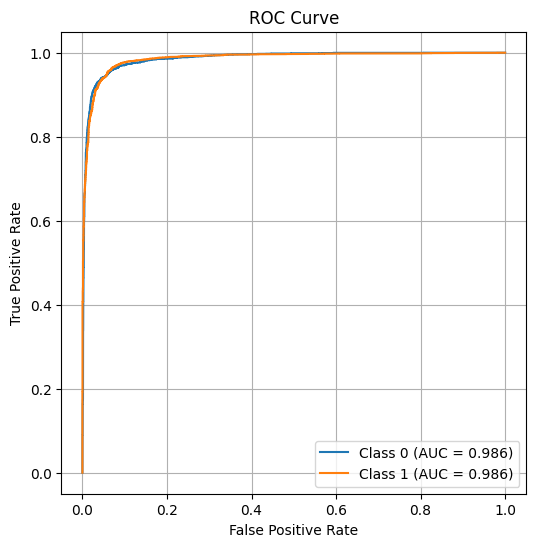

In [9]:
# Vizualizace pr≈Øbƒõhu tr√©nov√°n√≠
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], "ro-", label="Training loss")
plt.plot(history.history["val_loss"], "r-", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], "bo-", label="Training accuracy")
plt.plot(history.history["val_accuracy"], "b-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

plt.show()

# Predikce na testovac√≠ch datech
y_pred = model.predict([X_test_num, X_test_text])  # Predikce s obƒõma vstupy
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Klasifikaƒçn√≠ report a matice z√°mƒõn
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC k≈ôivka a AUC sk√≥re
plt.figure(figsize=(6, 6))
for i in range(y_train.shape[1]):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.3f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [8]:
# Naƒçten√≠ dat
def load_and_merge_data(train_path, test_path, submit_path):
    train_df = pd.read_csv(train_path, sep=';')
    test_df = pd.read_csv(test_path, sep=';')
    submit_df = pd.read_csv(submit_path, sep=';')
    test_df = pd.concat([test_df, submit_df], axis=0, ignore_index=True).drop(columns=["idS"], errors='ignore')
    df_all = pd.concat([train_df, test_df], axis=0, ignore_index=True)
    return df_all

# Funkce pro p≈ôedzpracov√°n√≠ dat
def preprocess_data(df, vocab_size=5000, max_length=100):
    target_column = df.columns[-1]
    X = df.drop(columns=[target_column])
    Y = df[target_column]

    # Imputace chybƒõj√≠c√≠ch numerick√Ωch hodnot
    imputer = SimpleImputer(strategy='mean')
    X_num_imputed = pd.DataFrame(imputer.fit_transform(X.select_dtypes(include=np.number)), columns=X.select_dtypes(include=np.number).columns)

    # Transformace textov√Ωch dat pomoc√≠ embedding vrstvy
    tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")  # Pou≈æijeme max 5000 slov
    if 'title' in df.columns:
        titles = df['title'].astype(str).fillna("")
        tokenizer.fit_on_texts(titles)
        X_title_seq = tokenizer.texts_to_sequences(titles)  # P≈ôevedeme text na ƒç√≠seln√© indexy
        X_title_padded = pad_sequences(X_title_seq, maxlen=max_length, padding='post')  # Zkr√°t√≠me/roz≈°√≠≈ô√≠me d√©lku na max_length
    else:
        X_title_padded = np.zeros((X.shape[0], max_length))  # Pokud title nen√≠, nastav√≠me nuly

    # Standardizace numerick√Ωch dat
    scaler = StandardScaler()
    X_num_scaled = scaler.fit_transform(X_num_imputed)


    # Label encoding a one-hot encoding pro c√≠lovou promƒõnnou
    label_encoder = LabelEncoder()
    Y_encoded = label_encoder.fit_transform(Y)
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    Y_onehot = one_hot_encoder.fit_transform(Y_encoded.reshape(-1, 1))

    return X_num_scaled, X_title_padded, Y_onehot, vocab_size, max_length # Return 5 items as line 43 expects

# Funkce pro vytvo≈ôen√≠ modelu
def create_model(input_shape, vocab_size, max_length, num_classes, embedding_dim=25): # Sn√≠≈æen√≠ embedding_dim
    input_num = Input(shape=(input_shape,))
    input_text = Input(shape=(max_length,))
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length)(input_text)
    flatten_layer = Flatten()(embedding_layer)
    merged = Concatenate()([input_num, flatten_layer])

    dense = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(merged) # Sn√≠≈æen√≠ neuron≈Ø a zv√Ω≈°en√≠ L2
    dense = BatchNormalization()(dense) # P≈ôid√°n√≠ BatchNormalization
    dense = Dropout(0.5)(dense) # Zv√Ω≈°en√≠ Dropout rate

    dense = Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(dense)
    dense = BatchNormalization()(dense) # P≈ôid√°n√≠ BatchNormalization
    dense = Dropout(0.5)(dense) # Zv√Ω≈°en√≠ Dropout rate

    dense = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(dense)
    dense = BatchNormalization()(dense) # P≈ôid√°n√≠ BatchNormalization

    output = Dense(num_classes, activation='softmax')(dense)

    model = Model(inputs=[input_num, input_text], outputs=output)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy']) # Sn√≠≈æen√≠ learning rate

    return model

# Naƒçten√≠ a p≈ôedzpracov√°n√≠ dat
df_all = load_and_merge_data('train (2).csv', 'test (1).csv', 'evaluation.csv')
X_num, X_text, Y, vocab_size, max_length = preprocess_data(df_all)

X_train_num, X_test_num, X_train_text, X_test_text, y_train, y_test = train_test_split(X_num, X_text, Y, test_size=0.2, random_state=42)


# Vytvo≈ôen√≠ a tr√©nov√°n√≠ modelu
model = create_model(X_train_num.shape[1], vocab_size, max_length, y_train.shape[1])

model.summary()

early_stopping = EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True, mode='max') # √öprava patience
reduce_lr = ReduceLROnPlateau(monitor="val_accuracy", factor=0.5, patience=2, min_lr=1e-6, mode='max') # √öprava patience

history = model.fit([X_train_num, X_train_text], y_train,
                    epochs=10, batch_size=64, # Sn√≠≈æen√≠ epochs a batch_size
                    validation_data=([X_test_num, X_test_text], y_test),
                    callbacks=[early_stopping, reduce_lr])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)              ‚îÉ Output Shape           ‚îÉ        Param # ‚îÉ Connected to           ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_1             ‚îÇ (None, 100)            ‚îÇ              0 ‚îÇ -                      ‚îÇ
‚îÇ (InputLayer)              ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ embedding (Embedding)     ‚îÇ (None, 100, 25)        ‚îÇ        125,000 ‚îÇ input_layer_1[0][0]    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ input_layer (InputLayer)  ‚îÇ (None, 1)              ‚îÇ              0 ‚îÇ -                      ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)         ‚îÇ (None, 2500)           ‚îÇ              0 ‚îÇ embedding[0][0]        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ concatenate (Concatenate) ‚îÇ (None, 2501)           ‚îÇ              0 ‚îÇ input_layer[0][0],     ‚îÇ
‚îÇ                           ‚îÇ                        ‚îÇ                ‚îÇ flatten[0][0]          ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)             ‚îÇ (None, 64)             ‚îÇ        160,128 ‚îÇ concatenate[0][0]      ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization       ‚îÇ (None, 64)             ‚îÇ            256 ‚îÇ dense[0][0]            ‚îÇ
‚îÇ (BatchNormalization)      ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)         ‚îÇ (None, 64)             ‚îÇ              0 ‚îÇ batch_normalization[0‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

 Total params: 288,218 (1.10 MB)

 Trainable params: 287,994 (1.10 MB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/10
508/508 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 11ms/step - accuracy: 0.6413 - loss: 0.8586 - val_accuracy: 0.8309 - val_loss: 0.6294 - learning_rate: 1.0000e-04
Epoch 2/10
508/508 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 13ms/step - accuracy: 0.8159 - loss: 0.5858 - val_accuracy: 0.8966 - val_loss: 0.4128 - learning_rate: 1.0000e-04
Epoch 3/10
508/508 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 12ms/step - accuracy: 0.8816 - loss: 0.4430 - val_accuracy: 0.9295 - val_loss: 0.3439 - learning_rate: 1.0000e-04
Epoch 4/10
508/508 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 11ms/step - accuracy: 0.9189 - loss: 0.3567 - val_accuracy: 0.9336 - val_loss: 0.2998 - learning_rate: 1.0000e-04
Epoch 5/10
508/508 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 13ms/step - accuracy: 0.9317 - loss: 0.3168 - val_accuracy: 0.9117 - val_loss: 0.3342 - learning_rate: 1.0000e-04
Epoch 6/10
50

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predikce na testovac√≠ch datech
y_pred_probs = model.predict(list(X_test_texts.values()))  # Pravdƒõpodobnosti t≈ô√≠d
y_pred = y_pred_probs.argmax(axis=1)  # P≈ôevod na nejpravdƒõpodobnƒõj≈°√≠ t≈ô√≠du
y_true = y_test.argmax(axis=1)  # Skuteƒçn√© hodnoty

# V√Ωpoƒçet metrik
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# V√Ωpis v√Ωsledk≈Ø
print(f'üîπ P≈ôesnost: {accuracy:.4f}')
print(f'üîπ Precision: {precision:.4f}')
print(f'üîπ Recall: {recall:.4f}')
print(f'üîπ F1-score: {f1:.4f}')


NameError: name 'model' is not defined

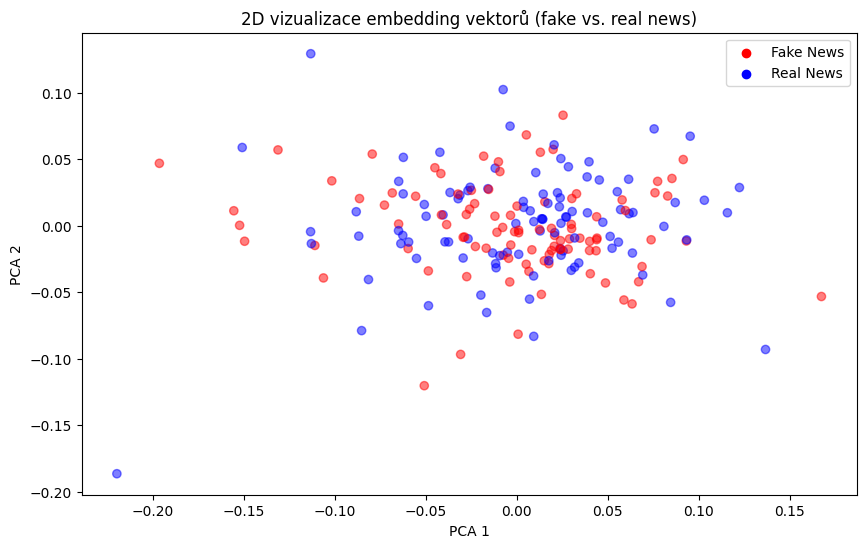

In [10]:
# Z√≠sk√°n√≠ embedding v√°h
embedding_layer = model.get_layer("embedding")  # N√°zev vrstvy m≈Ø≈æe b√Ωt jin√Ω
weights = embedding_layer.get_weights()[0]

# Redukce dimenze na 2D
pca = PCA(n_components=2)
reduced_weights = pca.fit_transform(weights[:200])  # Omez√≠me na prvn√≠ch 200 slov

# Z√≠sk√°n√≠ label≈Ø
labels = df_all['label'][:200]  # P≈ôedpokl√°d√°me, ≈æe prvn√≠ch 200 label≈Ø odpov√≠d√° prvn√≠m 200 slov≈Øm

# P≈ôi≈ôazen√≠ barev
colors = np.array(['red', 'blue'])  # ƒåerven√° pro fake news, modr√° pro real news
colored_labels = colors[labels]

# Vykreslen√≠ grafu s barevn√Ωm k√≥dov√°n√≠m
plt.figure(figsize=(10, 6))
plt.scatter(reduced_weights[:, 0], reduced_weights[:, 1], c=colored_labels, alpha=0.5)
plt.title("2D vizualizace embedding vektor≈Ø (fake vs. real news)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Vytvo≈ôen√≠ legendy pomoc√≠ scatter plot≈Ø
legend_elements = [plt.scatter([], [], marker='o', color=colors[0], label='Fake News'),
                   plt.scatter([], [], marker='o', color=colors[1], label='Real News')]
plt.legend(handles=legend_elements)

plt.show()

Neur√°ln√≠ s√≠≈• pro klasifikaci, kter√° kombinuje numerick√© a textov√© vstupy.
Byl pou≈æit slopec "title" i sloupec "news"

In [15]:
#Naƒçten√≠ dat
def load_and_merge_data(train_path, test_path, submit_path):
    train_df = pd.read_csv(train_path, sep=';')
    test_df = pd.read_csv(test_path, sep=';')
    submit_df = pd.read_csv(submit_path, sep=';')
    test_df = pd.concat([test_df, submit_df], axis=0, ignore_index=True).drop(columns=["idS"], errors='ignore')
    df_all = pd.concat([train_df, test_df], axis=0, ignore_index=True)
    return df_all

#Funkce pro p≈ôedzpracov√°n√≠ dat
def preprocess_data(df, vocab_size=10000, max_length=150):
    #C√≠lov√° promƒõnn√°
    Y = df['label']

    # Tokenizace textov√Ωch sloupc≈Ø
    tokenizers = {}
    X_text_padded = {}

    for col in ['title', 'text']:  #Zpracujeme oba textov√© sloupce
        tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
        texts = df[col].astype(str).fillna("")
        tokenizer.fit_on_texts(texts)
        sequences = tokenizer.texts_to_sequences(texts)
        X_text_padded[col] = pad_sequences(sequences, maxlen=max_length, padding='post')
        tokenizers[col] = tokenizer  #Ulo≈æ√≠me tokenizer pro pozdƒõj≈°√≠ pou≈æit√≠

    #Label encoding + OneHot encoding pro c√≠lovou promƒõnnou
    label_encoder = LabelEncoder()
    Y_encoded = label_encoder.fit_transform(Y)
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    Y_onehot = one_hot_encoder.fit_transform(Y_encoded.reshape(-1, 1))

    return X_text_padded, Y_onehot, vocab_size, max_length, tokenizers

#Funkce pro vytvo≈ôen√≠ modelu
def create_model(text_shapes, vocab_size, max_length, num_classes, embedding_dim=50):
    inputs = []
    processed_inputs = []

    #Embedding vrstvy pro textov√© vstupy
    for text_col, shape in text_shapes.items():
        input_text = Input(shape=(max_length,))
        embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length)(input_text)
        flatten_layer = Flatten()(embedding_layer)

        inputs.append(input_text)
        processed_inputs.append(flatten_layer)

    #Spojen√≠ v≈°ech vstup≈Ø
    merged = Concatenate()(processed_inputs)

    #Plnƒõ propojen√© vrstvy
    dense = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(merged)
    dense = BatchNormalization()(dense)
    dense = Dropout(0.4)(dense)

    dense = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(dense)
    dense = BatchNormalization()(dense)
    dense = Dropout(0.4)(dense)

    dense = Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(dense)
    dense = BatchNormalization()(dense)

    output = Dense(num_classes, activation='softmax')(dense)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Naƒçten√≠ a p≈ôedzpracov√°n√≠ dat
df_all = load_and_merge_data('train (2).csv', 'test (1).csv', 'evaluation.csv')
X_texts, Y, vocab_size, max_length, tokenizers = preprocess_data(df_all)  # Assign output to X_texts

# Rozdƒõlen√≠ na tr√©novac√≠ a testovac√≠ sadu
df = df_all
X_train_texts = {col: X_texts[col][:int(0.8 * len(df))] for col in X_texts}
X_test_texts = {col: X_texts[col][int(0.8 * len(df)):] for col in X_texts}
y_train = Y[:int(0.8 * len(df))]
y_test = Y[int(0.8 * len(df)):]
#Vytvo≈ôen√≠ modelu
model = create_model(
    text_shapes={col: max_length for col in X_train_texts},
    vocab_size=vocab_size,
    max_length=max_length,
    num_classes=y_train.shape[1]
)

model.summary()

#Tr√©nov√°n√≠ modelu
early_stopping = EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor="val_accuracy", factor=0.5, patience=2, min_lr=1e-6, mode='max')

history = model.fit(
    list(X_train_texts.values()),
    y_train,
    epochs=8, batch_size=128,
    validation_data=(list(X_test_texts.values()), y_test),
    callbacks=[early_stopping, reduce_lr]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)              ‚îÉ Output Shape           ‚îÉ        Param # ‚îÉ Connected to           ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_4             ‚îÇ (None, 150)            ‚îÇ              0 ‚îÇ -                      ‚îÇ
‚îÇ (InputLayer)              ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ input_layer_5             ‚îÇ (None, 150)            ‚îÇ              0 ‚îÇ -                      ‚îÇ
‚îÇ (InputLayer)              ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ embedding_3 (Embedding)   ‚îÇ (None, 150, 50)        ‚îÇ        500,000 ‚îÇ input_layer_4[0][0]    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ embedding_4 (Embedding)   ‚îÇ (None, 150, 50)        ‚îÇ        500,000 ‚îÇ input_layer_5[0][0]    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_3 (Flatten)       ‚îÇ (None, 7500)           ‚îÇ              0 ‚îÇ embedding_3[0][0]      ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_4 (Flatten)       ‚îÇ (None, 7500)           ‚îÇ              0 ‚îÇ embedding_4[0][0]      ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ concatenate_2             ‚îÇ (None, 15000)          ‚îÇ              0 ‚îÇ flatten_3[0][0],       ‚îÇ
‚îÇ (Concatenate)             ‚îÇ                        ‚îÇ                ‚îÇ flatten_4[0][0]        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_8 (Dense)           ‚îÇ (None, 128)            ‚îÇ      1,920,128 ‚îÇ concatenate_2[0][0]    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

 Total params: 2,931,426 (11.18 MB)

 Trainable params: 2,930,978 (11.18 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/8
254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30s 100ms/step - accuracy: 0.6579 - loss: 1.0989 - val_accuracy: 0.6800 - val_loss: 0.9478 - learning_rate: 5.0000e-05
Epoch 2/8
254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 92ms/step - accuracy: 0.8410 - loss: 0.7440 - val_accuracy: 0.9088 - val_loss: 0.6483 - learning_rate: 5.0000e-05
Epoch 3/8
254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24s 96ms/step - accuracy: 0.9038 - loss: 0.6086 - val_accuracy: 0.9311 - val_loss: 0.5391 - learning_rate: 5.0000e-05
Epoch 4/8
254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24s 96ms/step - accuracy: 0.9378 - loss: 0.5202 - val_accuracy: 0.9563 - val_loss: 0.4605 - learning_rate: 5.0000e-05
Epoch 5/8
254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41s 97ms/step - accuracy: 0.9582 - loss: 0.4571 - val_accuracy: 0.9627 - val_loss: 0.4277 - learning_rate: 5.0000e-05
Epoch 6/8
254/

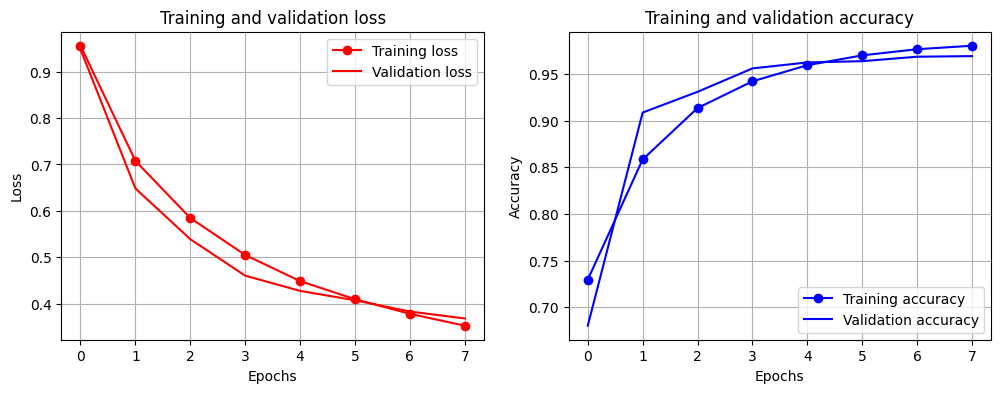

254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 11ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3804
           1       0.98      0.97      0.97      4314

    accuracy                           0.97      8118
   macro avg       0.97      0.97      0.97      8118
weighted avg       0.97      0.97      0.97      8118


Confusion Matrix:


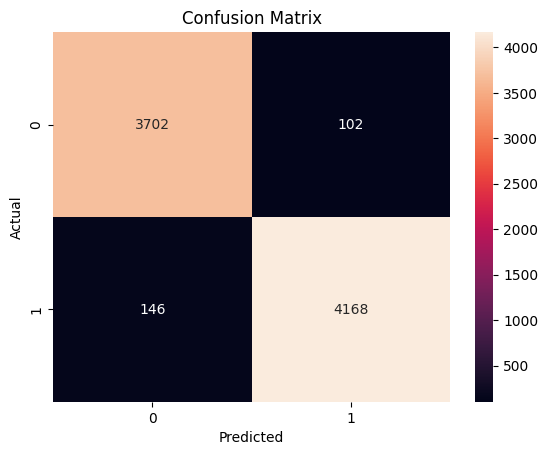

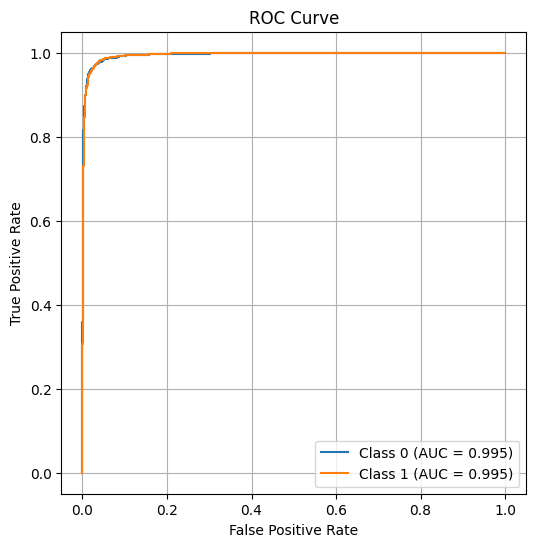

In [17]:
# Vizualizace pr≈Øbƒõhu tr√©nov√°n√≠
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], "ro-", label="Training loss")
plt.plot(history.history["val_loss"], "r-", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], "bo-", label="Training accuracy")
plt.plot(history.history["val_accuracy"], "b-", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

plt.show()

# Predikce na testovac√≠ch datech
y_pred = model.predict(list(X_test_texts.values()))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Klasifikaƒçn√≠ report a matice z√°mƒõn
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_classes, y_pred_classes)

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC k≈ôivka a AUC sk√≥re
plt.figure(figsize=(6, 6))
for i in range(y_train.shape[1]):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.3f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predikce na testovac√≠ch datech
y_pred_probs = model.predict(list(X_test_texts.values()))  # Pravdƒõpodobnosti t≈ô√≠d
y_pred = y_pred_probs.argmax(axis=1)  # P≈ôevod na nejpravdƒõpodobnƒõj≈°√≠ t≈ô√≠du
y_true = y_test.argmax(axis=1)  # Skuteƒçn√© hodnoty

# V√Ωpoƒçet metrik
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# V√Ωpis v√Ωsledk≈Ø
print(f'üîπ P≈ôesnost: {accuracy:.4f}')
print(f'üîπ Precision: {precision:.4f}')
print(f'üîπ Recall: {recall:.4f}')
print(f'üîπ F1-score: {f1:.4f}')


254/254 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step
üîπ P≈ôesnost: 0.9695
üîπ Precision: 0.9695
üîπ Recall: 0.9695
üîπ F1-score: 0.9695
